<a href="https://colab.research.google.com/github/joao-evaristo/Predicao_livros/blob/main/Modelo_predicao_livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predição de preços de livros

Nesse experimento será utilizado dados obtidos de editoras do segmento cristão. Para reunir informações foi utilizado um web scraping feito com a bliblioteca Selenium do Python. Por meio dele, todas as informações foram extraidas diretamente dos sites públicos dessas editoras. As editoras selecionadas para compor o dataset foram as seguintes: [Fiel](https://www.editorafiel.com.br/), [Trinitas](https://www.editoratrinitas.com.br/), [Cultura Cristã](https://editoraculturacrista.com.br/), [Hagnos](https://hagnos.com.br/), [Pronobis](https://pronobiseditora.com.br/), [Shedd](https://sheddpublicacoes.com.br/) e [Vida Nova](https://www.vidanova.com.br/).

O trecho a seguir serve para instanciar um dataframe para cada editora por meio do url dos datasets, que estão armazenados no [GitHub](https://github.com/joao-evaristo/Predicao_livros) no formato CSV.

In [616]:
url_fiel = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Fiel.csv'
url_trinitas = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Trinitas.csv'
url_culturacrista = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_CulturaCrista.csv'
url_hagnos = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Hagnos.csv'
url_pronobis = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Pronobis.csv'
url_shedd = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Shedd.csv'
url_vidanova = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_VidaNova.csv'

In [617]:
import pandas as pd
data_fiel = pd.read_csv(url_fiel)
data_fiel.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,"Adoração - Prioridade, Princípios e Prática",John Charles Ryle,Editora Fiel,48,12.00 x 16.50 cm,53.00 g.,Brochura,"Doutrina, Devocional, Vida Cristã",2010.0,17.7
1,Adoração no Lar,Joel Beeke,Editora Fiel,96,12.00 x 16.00 cm,130.00 g.,Brochura,"Familia, Vida Cristã",2012.0,28.8
2,Amado Timóteo,Tom Ascol,Editora Fiel,320,14.00 x 21.00 cm,391.00 g.,Brochura,"Teologia, Ministério",2005.0,81.9
3,Antes de Partir: Encarando a morte com confian...,Nancy Guthrie,Editora Fiel,176,14.00 x 21.00 cm,205.00 g.,Brochura,"Aconselhamento, Vida Cristã",2013.0,51.4
4,O Antigo Evangelho: Um desafio para redescobri...,J. I. PACKER,Editora FIEL,72,12.00 x 16.00 cm,73.00 g.,Brochura,Doutrina,2013.0,35.5


In [618]:
data_trinitas = pd.read_csv(url_trinitas)
data_trinitas.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Livro Os Inklings: O grupo literário de C.S. L...,Igor Gaspar e Gabriele Greggersen,Editora Trinitas,112.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
1,Livro Meios Essenciais de Graça - Paul Washer,Paul Washer,Editora Trinitas,92.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,30
2,Livro Breve Manual de Conservadorismo - Russel...,Russell Kirk,Editora Trinitas,136.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
3,Livro Cultivando um Coração de Virtudes - Vige...,Vigen Guroian,Editora Trinitas,252.0,14cm x 21cm,290 gramas,Brochura,NaN,1ª Edição,50
4,Livro Gratidão - Mary K. Mohler,Mary K. Mohler,Editora Trinitas,144.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,40


In [619]:
data_culturacrista = pd.read_csv(url_culturacrista)
data_culturacrista.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Firmando os Passos (06) - O livro de Deus - Al...,Desconhecido,Cultura Cristã,16,31 × 22 cm,0.120 kg,Envelope,NaN,2009.0,R$6.00
1,Firmando os Passos (06) - O livro de Deus - Al...,Desconhecido,Cultura Cristã,16,31 × 22 cm,0.120 kg,Envelope,NaN,2009.0,R$6.00
2,Firmando os Passos (06) - O livro de Deus - Pr...,Desconhecido,Cultura Cristã,56,21 × 28 cm,0.140 kg,Brochura,NaN,2009.0,R$8.00
3,Firmando os Passos (06) - O livro de Deus - Pr...,Desconhecido,Cultura Cristã,56,21 × 28 cm,0.140 kg,Brochura,NaN,2009.0,R$8.00
4,Firmando os Passos (06) - O livro de Deus – Vi...,Desconhecido,Cultura Cristã,NaN,44 × 31 cm,0.860 kg,NaN,NaN,NaN,R$20.00


In [620]:
data_hagnos = pd.read_csv(url_hagnos)
data_hagnos.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,O amor tem um nome,Adam Weber,Hagnos,288,16x23 Cm,380g,Brochura,NaN,2021.0,"R$ 47,90"
1,Filhos da Promessa - Spurgeon,Charles H. Spurgeon,Hagnos,160,16x23 Cm,340g,Capa Dura,NaN,2021.0,"R$ 39,90"
2,Contos ecológicos,Paulo Debs,United Press,48,18x24 Cm,200g,Brochura,NaN,NaN,"R$ 16,90"
3,"Nova Bíblia Viva – Estudo, leitura e compreens...",NaN,Hagnos,1.552,16x23 Cm,940g,Capa PU + Douração Lateral,NaN,2021.0,"R$ 177,89"
4,"Nova Bíblia Viva – Estudo, leitura e compreens...",NaN,Hagnos,1.552,16x23 Cm,940g,Capa PU + Douração Lateral,NaN,2021.0,"R$ 177,89"


In [621]:
data_pronobis = pd.read_csv(url_pronobis)
data_pronobis.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Teologia do dia a dia – Aquilo em que você acr...,Mary Wiley,Pronobis,223,23 × 16 cm,370 g,Brochura,NaN,2022,"R$72,40"
1,Adoração no Lar,Donald S. Whitney,Pronobis,96,14 × 21 cm,130 g,Brochura,NaN,2022,"R$37,90"
2,Retratos Puritanos,J. I. Packer,Pronobis,262,14 × 21 cm,350 g,Brochura,NaN,2022,"R$56,80"
3,Coração Missionário de Jonathan Edwards,Rennan Dias,Pronobis,144,21 × 14 cm,1130 g,Brochura,NaN,2022,"R$39,90"
4,História dos Batistas: Da Inglaterra para o Mundo,Anthony L. Chute,Pronobis,440,23 × 16 cm,1135 g,Brochura,NaN,2022,"R$189,90"


In [622]:
data_shedd = pd.read_csv(url_shedd)
data_shedd.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Livro Os Inklings: O grupo literário de C.S. L...,Igor Gaspar e Gabriele Greggersen,Editora Trinitas,112.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
1,Livro Meios Essenciais de Graça - Paul Washer,Paul Washer,Editora Trinitas,92.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,30
2,Livro Breve Manual de Conservadorismo - Russel...,Russell Kirk,Editora Trinitas,136.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
3,Livro Cultivando um Coração de Virtudes - Vige...,Vigen Guroian,Editora Trinitas,252.0,14cm x 21cm,290 gramas,Brochura,NaN,1ª Edição,50
4,Livro Gratidão - Mary K. Mohler,Mary K. Mohler,Editora Trinitas,144.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,40


In [623]:
data_vidanova = pd.read_csv(url_vidanova)
data_vidanova.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,"Jesus, o filho de Deus",D. A. Carson,Editora VIDA NOVA,128,14 x 21 cm,165,Brochura,NaN,2015.0,37.9
1,"Fim da pobreza, O",Aaron Armstrong,Editora VIDA NOVA,128,14 x 21 cm,159,Brochura,NaN,2015.0,33.9
2,"Deus, casamento e família - 2ª ed. ampliada",Andreas J. Köstenberger e David W. Jones,Editora VIDA NOVA,352,16 x 23 cm,492,Brochura,NaN,2015.0,83.9
3,"Fé na era do ceticismo, A",Timothy Keller,Editora VIDA NOVA,288,16 x 23 cm,438,Brochura,NaN,2015.0,81.9
4,"Eclesiastes e Cantares, introdução e comentário","Michael A. Eaton, G. Lloyd Carr",Editora VIDA NOVA,336,14 x 21 cm,350,Brochura,NaN,1989.0,93.9


Depois que todos os datasets estão em formato de dataframe, é possível reuni-los em um dataframe único que será utilizado como a base de dados principal para o experimento.

In [624]:
frames = [data_fiel, data_trinitas, data_culturacrista, data_hagnos, data_pronobis, data_shedd, data_vidanova]
data = pd.concat(frames)
data

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,"Adoração - Prioridade, Princípios e Prática",John Charles Ryle,Editora Fiel,48,12.00 x 16.50 cm,53.00 g.,Brochura,"Doutrina, Devocional, Vida Cristã",2010.0,17.7
1,Adoração no Lar,Joel Beeke,Editora Fiel,96,12.00 x 16.00 cm,130.00 g.,Brochura,"Familia, Vida Cristã",2012.0,28.8
2,Amado Timóteo,Tom Ascol,Editora Fiel,320,14.00 x 21.00 cm,391.00 g.,Brochura,"Teologia, Ministério",2005.0,81.9
3,Antes de Partir: Encarando a morte com confian...,Nancy Guthrie,Editora Fiel,176,14.00 x 21.00 cm,205.00 g.,Brochura,"Aconselhamento, Vida Cristã",2013.0,51.4
4,O Antigo Evangelho: Um desafio para redescobri...,J. I. PACKER,Editora FIEL,72,12.00 x 16.00 cm,73.00 g.,Brochura,Doutrina,2013.0,35.5
...,...,...,...,...,...,...,...,...,...,...
697,Conselhos para obreiros,C. H. Spurgeon,Editora VIDA NOVA,160,14 x 21 cm,205,Brochura,NaN,2015.0,39.9
698,Romanos - Série comentário expositivo,C. Marvin Pate,Editora VIDA NOVA,368,17 x 23 cm,581,Brochura,NaN,2015.0,95.9
699,Gálatas para você,Timothy Keller,Editora VIDA NOVA,208,14 x 21 cm,249,Brochura,NaN,2015.0,54.9
700,"Efésios, introdução e comentário",Francis Foulkes,Editora VIDA NOVA,152,14 x 21 cm,166,Brochura,NaN,1983.0,45.9


Agora, é possível visualizar a participação de cada editora no dataframe.

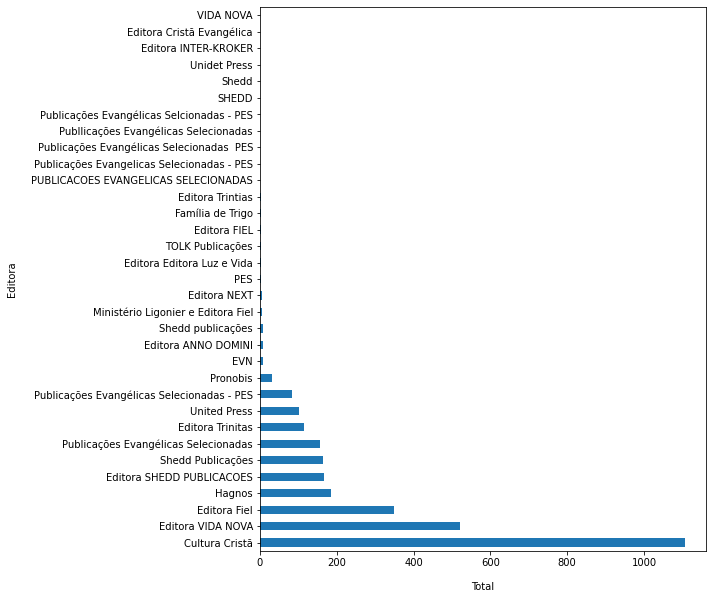

In [625]:
import matplotlib.pyplot as plt
data['Editora'].value_counts().plot(kind='barh', figsize=(8, 10))
plt.xlabel("Total", labelpad=14)
plt.ylabel("Editora", labelpad=14)

plt.show()

Como é possível constatar, há livros em que, seja por grafia ou por abreviação, a editora é a mesma que de outras amostras, porém foram indicados como de editoras distintas. Para isso, é necessário fazer um tratamento que coloque os livros de mesma editora juntos. Exemplo, livros da editora 'Editora FIEL' também fazem parte da editora 'Editora Fiel'.

In [626]:
rows = data['Editora'].str.contains("VIDA NOVA", na=False)
data.loc[rows, 'Editora'] = 'Editora VIDA NOVA'
rows = data['Editora'].str.contains("PES|Selecionadas|Selcionadas", na=False, case=False)
data.loc[rows, 'Editora'] = 'PES'
rows = data['Editora'].str.contains("SHEDD", na=False, case=False)
data.loc[rows, 'Editora'] = 'Editora Shedd'
rows = data['Editora'].str.contains("Editora Fiel", na=False, case=False)
data.loc[rows, 'Editora'] = 'Editora Fiel'
rows = data['Editora'].str.contains("Trintias", na=False)
data.loc[rows, 'Editora'] = 'Editora Trinitas'
rows = data['Editora'].str.contains("Unidet", na=False)
data.loc[rows, 'Editora'] = 'United Press'

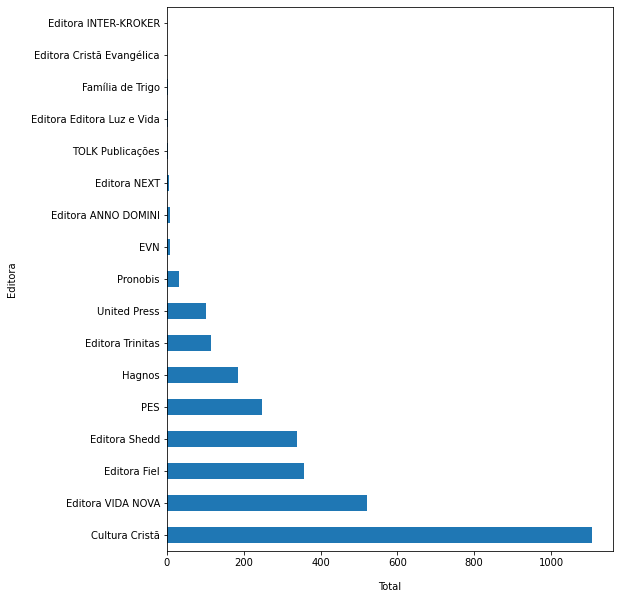

In [627]:
data['Editora'].value_counts().plot(kind='barh', figsize=(8, 10))
plt.xlabel("Total", labelpad=14)
plt.ylabel("Editora", labelpad=14)

plt.show()

Após a aglutinação das editoras, é importante verificar e tratar, caso existam, os dados que estão com valor nulo.

In [628]:
print(data.isnull().sum())  # descobre-se quais colunas possuem dados faltantes

Título           1
Autor           54
Editora         17
Páginas        256
Formato        468
Peso            25
Acabamento      30
Categoria     2258
Edição         643
Preço            2
dtype: int64


Aqui, as linhas que possuem valores nulos nas colunas Autor, Categoria, Formato e Acabamento serão preenchidas com valores padrão ou como "Desconhecido(a)". A seguir, as amostras que ainda possuem dados nulos são excluidas do dataset e o restante passa por um tratamento necessário para prosseguir com o pipeline. 

In [629]:
data['Autor'].fillna(value='Desconhecido', inplace=True)
data['Categoria'].fillna(value='Desconhecida', inplace=True)
data['Formato'].fillna(value='14 x 21cm', inplace=True)
data['Acabamento'].fillna(value='Brochura', inplace=True)

In [630]:
data = data.copy()
data = data.dropna()
data.drop("Título", axis=1, inplace=True)
data = data[data["Editora"].str.contains("Família de Trigo") == False]
data = data.apply(lambda x: x.astype(str).str.upper())
data = data.assign(Páginas = lambda x: x['Páginas'].astype(str).str.extract('(\d+)'))
data = data.assign(Peso = lambda x: x['Peso'].astype(str).str.extract('(\d+)'))
rows = data['Edição'].str.contains("EDIÇÃO")
data.loc [rows, 'Edição'] = '2020.0'
data['Preço'] = data['Preço'].apply(lambda x: str(x).replace('R$', '').replace(' ', ''))
data['Preço'] = data['Preço'].apply(lambda x: str(x).replace('.', '') if len(str(x))>=8 else x)
data['Preço'] = data['Preço'].apply(lambda x: str(x).replace(',', '.'))
data['Formato'] = data['Formato'].apply(lambda x: eval(str(x).replace('X', '*').replace('×', '*').replace('CM', '').replace(',', '.').rstrip('.')))
data

,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,JOHN CHARLES RYLE,EDITORA FIEL,48,198.0,53,BROCHURA,"DOUTRINA, DEVOCIONAL, VIDA CRISTÃ",2010.0,17.7
1,JOEL BEEKE,EDITORA FIEL,96,192.0,130,BROCHURA,"FAMILIA, VIDA CRISTÃ",2012.0,28.8
2,TOM ASCOL,EDITORA FIEL,320,294.0,391,BROCHURA,"TEOLOGIA, MINISTÉRIO",2005.0,81.9
3,NANCY GUTHRIE,EDITORA FIEL,176,294.0,205,BROCHURA,"ACONSELHAMENTO, VIDA CRISTÃ",2013.0,51.4
4,J. I. PACKER,EDITORA FIEL,72,192.0,73,BROCHURA,DOUTRINA,2013.0,35.5
...,...,...,...,...,...,...,...,...,...
697,C. H. SPURGEON,EDITORA VIDA NOVA,160,294.0,205,BROCHURA,DESCONHECIDA,2015.0,39.9
698,C. MARVIN PATE,EDITORA VIDA NOVA,368,391.0,581,BROCHURA,DESCONHECIDA,2015.0,95.9
699,TIMOTHY KELLER,EDITORA VIDA NOVA,208,294.0,249,BROCHURA,DESCONHECIDA,2015.0,54.9
700,FRANCIS FOULKES,EDITORA VIDA NOVA,152,294.0,166,BROCHURA,DESCONHECIDA,1983.0,45.9


Com o tratamento dos nulos, pode-se verificar quais editoras farão parte do dataset final.

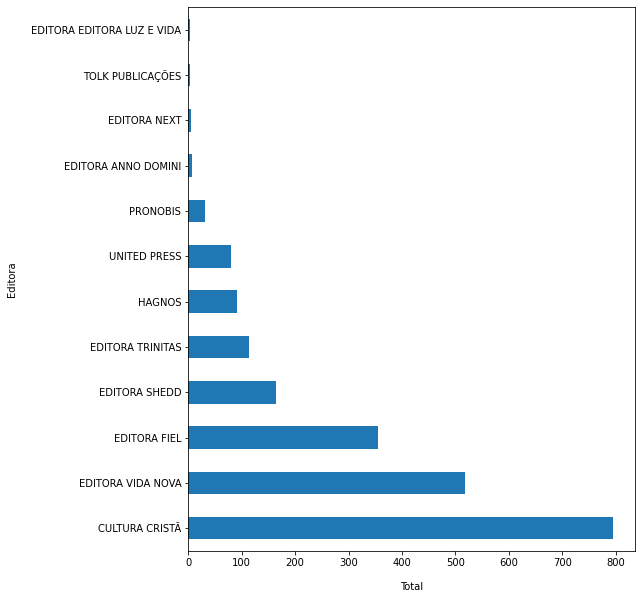

In [631]:
data['Editora'].value_counts().plot(kind='barh', figsize=(8, 10))
plt.xlabel("Total", labelpad=14)
plt.ylabel("Editora", labelpad=14)

plt.show()

Como os dados de Categoria, Acabamento, Editora e Autor possuem dados no formato string, é necessário trarnsforma-los em um formato que os modelos do sklearn consigam utilizar. Para isso, cada um desses campos tem os seus valores transformados em números.

In [632]:
from sklearn.preprocessing import LabelEncoder

le_category = LabelEncoder()
le_finishing = LabelEncoder()
le_publishing = LabelEncoder()
le_author = LabelEncoder()
data["Categoria"] = le_category.fit_transform(data['Categoria'])
data["Acabamento"]  = le_finishing.fit_transform(data['Acabamento'])
data["Editora"] = le_publishing.fit_transform(data['Editora'])
data["Autor"] = le_author.fit_transform(data['Autor'])
data = data.astype(float)
data = data[data['Peso'] > 10]
data

,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,326.0,3.0,48.0,198.0,53.0,2.0,40.0,2010.0,17.7
1,318.0,3.0,96.0,192.0,130.0,2.0,54.0,2012.0,28.8
2,611.0,3.0,320.0,294.0,391.0,2.0,126.0,2005.0,81.9
3,466.0,3.0,176.0,294.0,205.0,2.0,5.0,2013.0,51.4
4,274.0,3.0,72.0,192.0,73.0,2.0,35.0,2013.0,35.5
...,...,...,...,...,...,...,...,...,...
697,70.0,7.0,160.0,294.0,205.0,2.0,29.0,2015.0,39.9
698,72.0,7.0,368.0,391.0,581.0,2.0,29.0,2015.0,95.9
699,604.0,7.0,208.0,294.0,249.0,2.0,29.0,2015.0,54.9
700,204.0,7.0,152.0,294.0,166.0,2.0,29.0,1983.0,45.9


Separação dos parâmetros X e Y que serão utilizados nos modelos.

Para ter uma noção da relação entre as features e o preço, que é o alvo nesse experimento, utilizare-mos um heatmap das correlações das features.Nele, quanto mais próximo de 1 ou -1, maior a relação, tanto positiva quanto negativa entre as features.

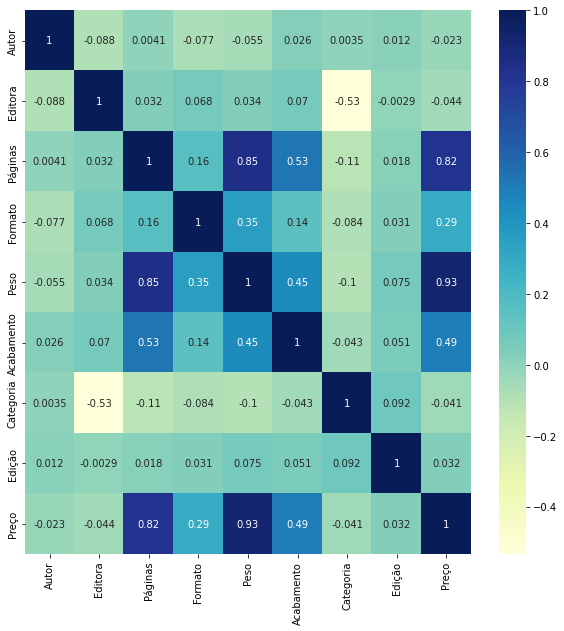

In [633]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


Para a visualização, caso existam, dos outliers, utilizare-mos boxplots, que permitem ter a ideia dos intervalos dos dados de cada feature.

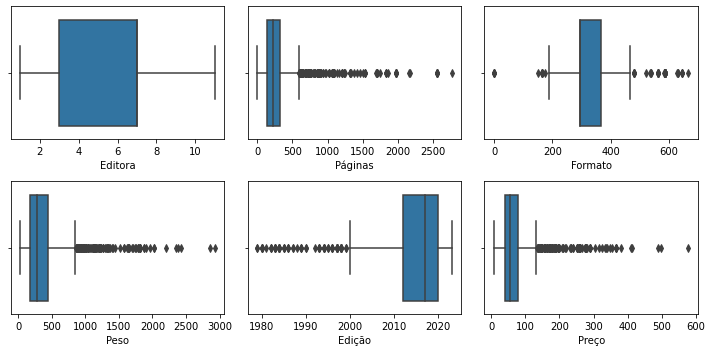

In [634]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
plt1 = sns.boxplot(x=data['Editora'], ax=axs[0, 0])
plt2 = sns.boxplot(x=data['Páginas'], ax=axs[0, 1])
plt3 = sns.boxplot(x=data['Formato'], ax=axs[0, 2])
plt4 = sns.boxplot(x=data['Peso'], ax=axs[1, 0])
plt5 = sns.boxplot(x=data['Edição'], ax=axs[1, 1])
plt6 = sns.boxplot(x=data['Preço'], ax=axs[1, 2])
plt.tight_layout()
plt.show()

É possível notar a presença de outliers em Páginas, Formato, Peso, Edição e Preço.

In [635]:
cols = ['Páginas', 'Formato', 'Peso', 'Preço', 'Edição']
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

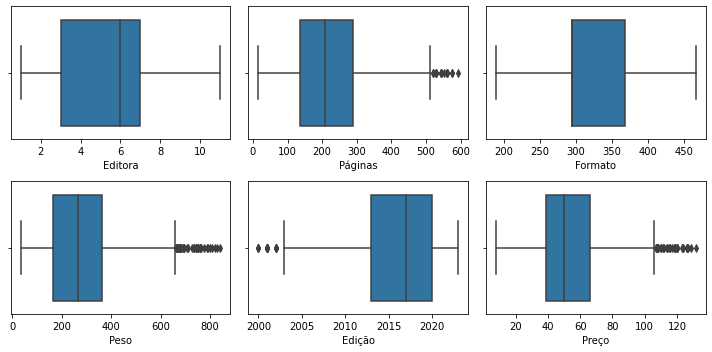

In [636]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
plt1 = sns.boxplot(x=data['Editora'], ax=axs[0, 0])
plt2 = sns.boxplot(x=data['Páginas'], ax=axs[0, 1])
plt3 = sns.boxplot(x=data['Formato'], ax=axs[0, 2])
plt4 = sns.boxplot(x=data['Peso'], ax=axs[1, 0])
plt5 = sns.boxplot(x=data['Edição'], ax=axs[1, 1])
plt6 = sns.boxplot(x=data['Preço'], ax=axs[1, 2])
plt.tight_layout()
plt.show()

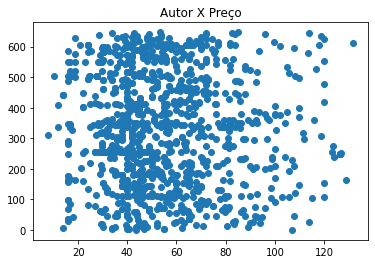

In [637]:
plt.scatter(data.Preço, data.Autor)
plt.title("Autor X Preço")
plt.show()

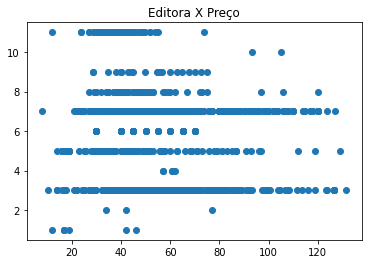

In [638]:
plt.scatter(data.Preço, data.Editora)
plt.title("Editora X Preço")
plt.show()

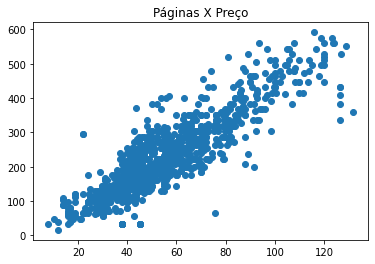

In [639]:
plt.scatter(data.Preço, data.Páginas)
plt.title("Páginas X Preço")
plt.show()

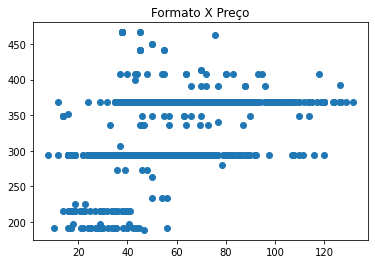

In [640]:
plt.scatter(data.Preço, data.Formato)
plt.title("Formato X Preço")
plt.show()

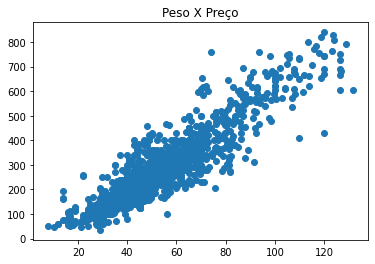

In [641]:
plt.scatter(data.Preço, data.Peso)
plt.title("Peso X Preço")
plt.show()

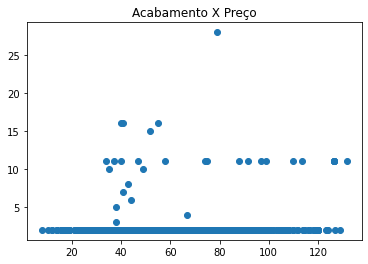

In [642]:
plt.scatter(data.Preço, data.Acabamento)
plt.title("Acabamento X Preço")
plt.show()

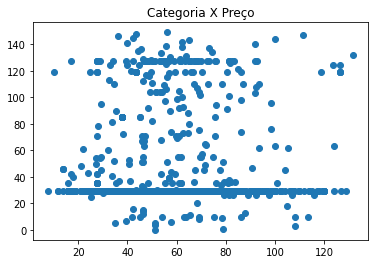

In [643]:
plt.scatter(data.Preço, data.Categoria)
plt.title("Categoria X Preço")
plt.show()

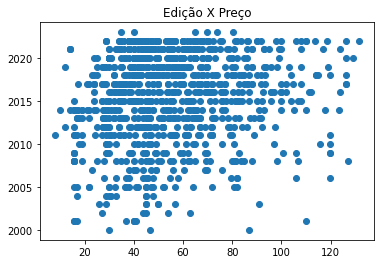

In [644]:
plt.scatter(data.Preço, data.Edição)
plt.title("Edição X Preço")
plt.show()

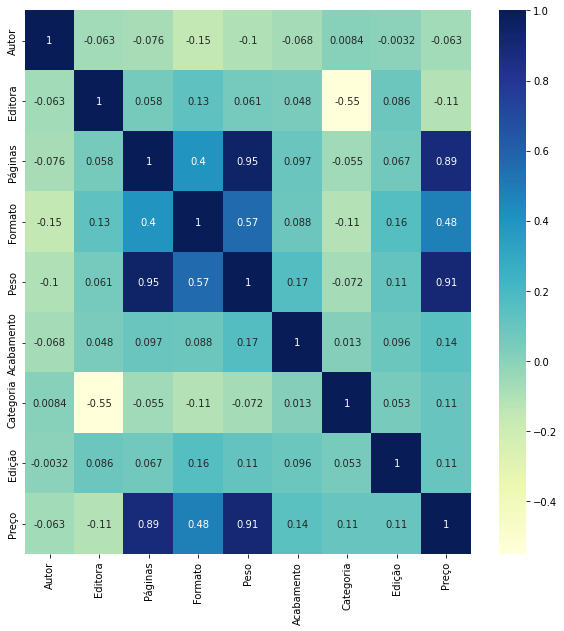

In [645]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [646]:
X=data.drop('Preço',axis=1)
y=data['Preço']

In [647]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)# Separando teste e treino
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [648]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,60.013284
1,40.0,31.785574
2,46.0,53.059441
3,15.9,26.036790
4,53.9,56.893341


MSE raiz = quanto de perda que tem na precificação

In [649]:
from sklearn.metrics import mean_squared_error

print('LinearRegression')
print('Score: {}'.format(lr.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

LinearRegression
Score: 0.8700795258210056
MSE: 77.79359786453536


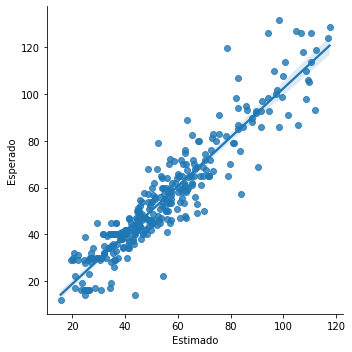

In [650]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [712]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.969412
1,40.0,40.000000
2,46.0,49.955685
3,15.9,17.454982
4,53.9,59.329130


In [713]:
print('KNN')
print('Score: {}'.format(knn.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

KNN
Score: 0.8721304093975883
MSE: 76.5655726958167


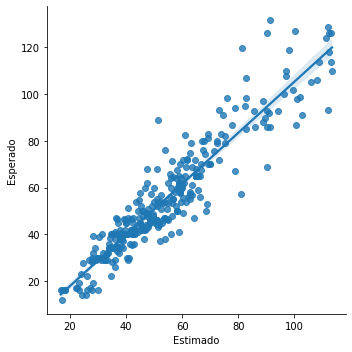

In [653]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [750]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.2, random_state=42, n_estimators=450)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,56.884115
1,40.0,38.741425
2,46.0,51.777437
3,15.9,20.958729
4,53.9,54.873737


In [751]:
print('Gradient Boosting Regressor')
print('Score: {}'.format(gbr.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Gradient Boosting Regressor
Score: 0.9232105417769586
MSE: 45.979883240024755


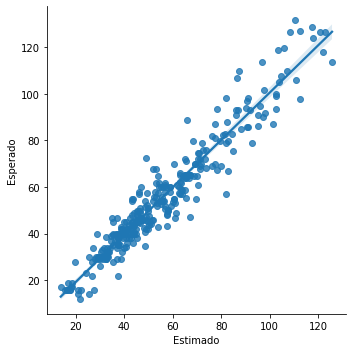

In [752]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [657]:
from sklearn.linear_model import ElasticNet
elasnet = ElasticNet()
elasnet.fit(X_train, y_train)
y_pred = elasnet.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.533405
1,40.0,31.464039
2,46.0,52.343796
3,15.9,25.708801
4,53.9,56.778318


In [658]:
print('ElasticNet')
print('Score: {}'.format(elasnet.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

ElasticNet
Score: 0.8738232899403079
MSE: 75.55191207761746


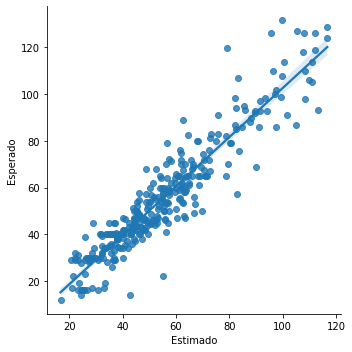

In [659]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [791]:
from sklearn.svm import SVR
svr=SVR(kernel='poly', degree=9, coef0=0.8)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,56.841091
1,40.0,31.947932
2,46.0,49.213226
3,15.9,23.593880
4,53.9,58.127654


In [792]:
print('SVR')
print('Score: {}'.format(svr.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

SVR
Score: 0.8773904841424408
MSE: 73.41595257609113


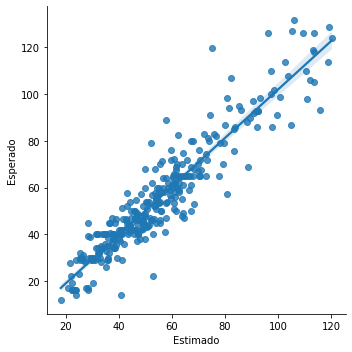

In [793]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [810]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,58.123333
1,40.0,36.818000
2,46.0,55.688467
3,15.9,16.531667
4,53.9,58.428000


In [811]:
print('RandomForestRegressor')
print('Score: {}'.format(rf.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

RandomForestRegressor
Score: 0.8927581563028293
MSE: 64.21411956467372


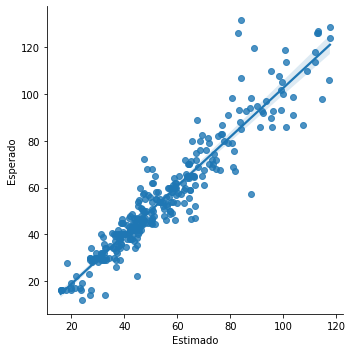

In [812]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [666]:
from sklearn.linear_model import BayesianRidge

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
y_pred = bayesian.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.743106
1,40.0,31.696216
2,46.0,52.631897
3,15.9,25.818667
4,53.9,56.934812


In [667]:
print('BayesianRidge')
print('Score: {}'.format(bayesian.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

BayesianRidge
Score: 0.8713722563448453
MSE: 77.01953850896183


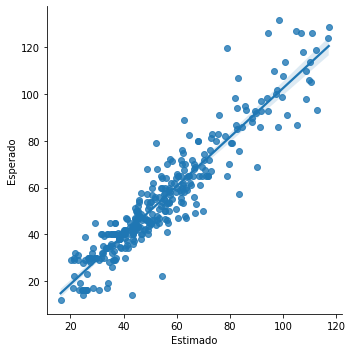

In [668]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [669]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.492286
1,40.0,31.442043
2,46.0,52.310801
3,15.9,25.737625
4,53.9,56.731068


In [670]:
print('Lasso')
print('Score: {}'.format(lasso.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Lasso
Score: 0.8737279469734959
MSE: 75.60900140450191


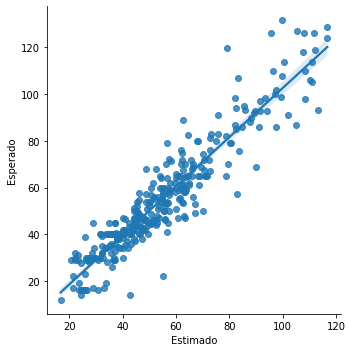

In [671]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [672]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,60.013203
1,40.0,31.785547
2,46.0,53.059312
3,15.9,26.036724
4,53.9,56.893354


In [673]:
print('Ridge')
print('Score: {}'.format(ridge.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Ridge
Score: 0.8700799579089014
MSE: 77.7933391395559


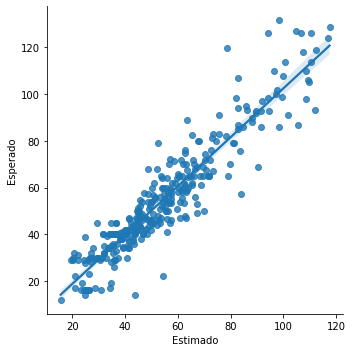

In [674]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df);
plt.show()

In [692]:
import re

author = input('Autor: ')
publishing = input('Editora: ')
pages = input('Páginas: ')
format = input('Formato (largura x altura em centimetros): ')
weight = input('Peso (em gramas): ')
finishing = input('Acabamento: ')
category = input('Categoria: ')
edition = input('Edição (ano): ')

dict_book = {'Autor': author,
             'Editora': publishing,
             'Páginas': pages,
             'Formato': format,
             'Peso': weight,
             'Acabamento': finishing,
             'Categoria': category,
             'Edição': edition}

for k,v in dict_book.items():
  if isinstance(v, str):
    dict_book.update({k: v.upper()})

book_serie = pd.Series(dict_book)

Autor: Emilio Garofalo Neto
Editora: Editora Fiel
Páginas: 136 páginas
Formato (largura x altura em centimetros): 14 x 21cm
Peso (em gramas): 190 g.
Acabamento: Brochura
Categoria: Vida Cristã, Cosmovisão 
Edição (ano): 2023


In [693]:
print(book_serie)

Autor             EMILIO GAROFALO NETO
Editora                   EDITORA FIEL
Páginas                    136 PÁGINAS
Formato                      14 X 21CM
Peso                            190 G.
Acabamento                    BROCHURA
Categoria     VIDA CRISTÃ, COSMOVISÃO 
Edição                            2023
dtype: object


In [694]:
le_dict_author = dict(zip(le_author.classes_, le_author.transform(le_author.classes_)))
le_dict_finishing = dict(zip(le_finishing.classes_, le_finishing.transform(le_finishing.classes_)))
le_dict_category = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
le_dict_publishing = dict(zip(le_publishing.classes_, le_publishing.transform(le_publishing.classes_)))


new_author = le_dict_author.get(book_serie['Autor'], '<Unknown>')
new_category = le_dict_category.get(book_serie['Categoria'], '<Unknown>')
new_publishing = le_dict_publishing.get(book_serie['Editora'], '<Unknown>')
new_finishing = le_dict_finishing.get(book_serie['Acabamento'], '<Unknown>')

if new_author == '<Unknown>':
  new_author = le_dict_author.get('DESCONHECIDO')

if new_category == '<Unknown>':
  new_category = le_dict_category.get('DESCONHECIDA')

if new_publishing == '<Unknown>':
  new_publishing = le_dict_publishing.get('EDITORA FIEL')

if new_finishing == '<Unknown>':
  new_finishing = le_dict_finishing.get('BROCHURA')


book_serie['Autor'] = new_author
book_serie['Categoria'] = new_category
book_serie['Editora'] = new_publishing
book_serie['Acabamento'] = new_finishing
book_serie['Páginas'] = re.findall(r'\d+', book_serie['Páginas'])[0]
book_serie['Peso'] = re.findall(r'\d+', book_serie['Peso'])[0]
book_serie['Formato'] = eval(str(book_serie['Formato']).replace('X', '*').replace('CM', ''))
book_serie = book_serie.astype(float)


print(book_serie)

Autor          191.0
Editora          3.0
Páginas        136.0
Formato        294.0
Peso           190.0
Acabamento       2.0
Categoria       29.0
Edição        2023.0
dtype: float64


In [813]:
price_predict = gbr.predict(book_serie.values.reshape(1, -1))[0]
print(f'Preço previsto para o livro de entrada = {price_predict}')

Preço previsto para o livro de entrada = 40.59404444894483
